In [1]:
import numpy as np
import gc
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns
from pathlib import Path
from scipy.spatial import distance_matrix

In [2]:
def read_bl2(path):
    return np.core.records.fromfile(str(path),formats='f8,(2048)i2,f8,(2048)i2',names='tstamp,pwave,ptime,wave')

In [3]:
saturatedData = np.array(np.arange(2048))
# List all files in directory using pathlib
basepath = Path("/Users/elicarter/Local/FominResearch/RealData/Runs/s_1000")
files_in_basepath = (entry for entry in basepath.iterdir() if entry.is_file())
for item in files_in_basepath:
    if str(item).endswith(".dat"):
        print("Adding " + str(item))
        saturatedData = np.vstack((saturatedData, read_bl2(item)["wave"]))
saturatedData = np.delete(saturatedData, [0], 0) #delete the placeholder shape row

Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000010_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000050_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000090_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000070_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000020_1.dat
Adding /Users/elicarter/Local/FominResearch/RealData/Runs/s_1000/s_1000_r_000001_1.dat


In [4]:
#delete all data that goes over 30,000 as it's pre amp saturated
data = np.copy(saturatedData)
over30k = False
#iterate backwards to avoid index proboems with removing
for i in range(len(saturatedData)-1,-1,-1):
    for j in range(len(saturatedData[0])-1,-1,-1):
        if (saturatedData[i,j] > 30000):
            data = np.delete(data, i, axis=0)
            break

In [5]:
data = data.astype(float)

In [6]:
#baseline shift data
for i in range(len(data)):
    avgShift = 0
    avgShift = np.average(data[i][0:400])
    print('Shifted by ' + str(avgShift) + " ")
    data[i] = data[i] - avgShift 

Shifted by -167.88 
Shifted by 135.12 
Shifted by -675.6 
Shifted by -525.92 
Shifted by -507.16 
Shifted by -114.12 
Shifted by 41.48 
Shifted by 146.8 
Shifted by -300.8 
Shifted by 164.08 
Shifted by -80.28 
Shifted by -375.92 
Shifted by -259.84 
Shifted by -326.68 
Shifted by -362.76 
Shifted by -499.2 
Shifted by -460.68 
Shifted by -374.64 
Shifted by -391.72 
Shifted by -167.56 
Shifted by -341.4 
Shifted by -160.0 
Shifted by -257.44 
Shifted by -724.04 
Shifted by -531.68 
Shifted by -68.48 
Shifted by -178.8 
Shifted by -442.68 
Shifted by -711.68 
Shifted by -533.08 
Shifted by 5.48 
Shifted by -457.0 
Shifted by -61.88 
Shifted by -608.04 
Shifted by -602.32 
Shifted by -103.56 
Shifted by -542.88 
Shifted by -633.84 
Shifted by -459.76 
Shifted by -511.24 
Shifted by -513.92 
Shifted by -327.08 
Shifted by -647.64 
Shifted by -377.8 
Shifted by -80.24 
Shifted by -483.28 
Shifted by 132.44 
Shifted by -687.24 
Shifted by -497.88 
Shifted by -680.68 
Shifted by -185.28 
Sh

Shifted by -283.72 
Shifted by 376.84 
Shifted by -68.24 
Shifted by -361.8 
Shifted by -623.96 
Shifted by -142.4 
Shifted by -271.72 
Shifted by -462.56 
Shifted by -391.56 
Shifted by -604.92 
Shifted by -348.92 
Shifted by -582.76 
Shifted by -404.92 
Shifted by -311.44 
Shifted by -349.6 
Shifted by 262.28 
Shifted by -588.44 
Shifted by -268.04 
Shifted by 47.68 
Shifted by -461.04 
Shifted by -446.64 
Shifted by -217.4 
Shifted by -588.6 
Shifted by 339.64 
Shifted by -217.92 
Shifted by -328.24 
Shifted by -273.24 
Shifted by 89.28 
Shifted by -269.28 
Shifted by -343.48 
Shifted by -653.72 
Shifted by -530.28 
Shifted by -316.44 
Shifted by -383.56 
Shifted by -365.64 
Shifted by -483.24 
Shifted by -500.36 
Shifted by -436.28 
Shifted by -377.92 
Shifted by -439.64 
Shifted by -428.2 
Shifted by -136.56 
Shifted by -201.72 
Shifted by -383.36 
Shifted by -151.36 
Shifted by -148.36 
Shifted by -399.12 
Shifted by -469.48 
Shifted by -459.84 
Shifted by -572.8 
Shifted by -645

Shifted by -408.92 
Shifted by -581.92 
Shifted by -383.72 
Shifted by -244.88 
Shifted by -476.92 
Shifted by -455.72 
Shifted by 36.28 
Shifted by -80.36 
Shifted by 110.8 
Shifted by -322.96 
Shifted by -132.76 
Shifted by -427.92 
Shifted by -70.0 
Shifted by -711.8 
Shifted by -93.64 
Shifted by -557.92 
Shifted by -6.8 
Shifted by -19.88 
Shifted by -519.48 
Shifted by -673.28 
Shifted by -164.12 
Shifted by -566.0 
Shifted by -192.36 
Shifted by -600.04 
Shifted by -241.6 
Shifted by -95.72 
Shifted by -739.68 
Shifted by 128.8 
Shifted by -153.2 
Shifted by -300.36 
Shifted by -461.0 
Shifted by 166.04 
Shifted by -158.8 
Shifted by -465.48 
Shifted by -366.64 
Shifted by -381.28 
Shifted by -563.24 
Shifted by -393.4 
Shifted by -96.72 
Shifted by -407.12 
Shifted by -211.24 
Shifted by -583.96 
Shifted by -498.44 
Shifted by -310.76 
Shifted by -67.04 
Shifted by -87.4 
Shifted by -348.2 
Shifted by -65.16 
Shifted by -329.4 
Shifted by -163.92 
Shifted by -104.52 
Shifted by

Shifted by -610.52 
Shifted by -455.56 
Shifted by 143.72 
Shifted by -507.28 
Shifted by -795.04 
Shifted by -320.32 
Shifted by -11.0 
Shifted by 250.96 
Shifted by -492.24 
Shifted by -215.68 
Shifted by -443.8 
Shifted by -99.2 
Shifted by -396.92 
Shifted by -116.6 
Shifted by -248.92 
Shifted by -652.04 
Shifted by -455.28 
Shifted by -67.28 
Shifted by -361.52 
Shifted by -351.0 
Shifted by -183.76 
Shifted by -495.52 
Shifted by -466.96 
Shifted by -254.08 
Shifted by -173.52 
Shifted by -98.64 
Shifted by -582.72 
Shifted by -455.52 
Shifted by -518.36 
Shifted by -480.68 
Shifted by -521.36 
Shifted by -584.88 
Shifted by -307.28 
Shifted by -424.32 
Shifted by -277.84 
Shifted by -551.4 
Shifted by -122.68 
Shifted by -945.08 
Shifted by -5009.12 
Shifted by -755.48 
Shifted by -295.16 
Shifted by -603.28 
Shifted by -312.2 
Shifted by -200.8 
Shifted by -95.12 
Shifted by -129.36 
Shifted by -850.96 
Shifted by -743.56 
Shifted by -365.24 
Shifted by -764.04 
Shifted by 7.5

Shifted by -610.2 
Shifted by -639.96 
Shifted by -224.76 
Shifted by -40.64 
Shifted by -625.96 
Shifted by -200.2 
Shifted by -389.04 
Shifted by -472.2 
Shifted by -396.6 
Shifted by -523.72 
Shifted by 59.36 
Shifted by 12.68 
Shifted by -5.68 
Shifted by -151.76 
Shifted by -247.72 
Shifted by -502.28 
Shifted by -575.68 
Shifted by -208.52 
Shifted by -85.44 
Shifted by -179.88 
Shifted by -606.08 
Shifted by -938.68 
Shifted by -701.96 
Shifted by -689.76 
Shifted by -301.6 
Shifted by 166.8 
Shifted by -79.08 
Shifted by -470.28 
Shifted by -87.52 
Shifted by -251.56 
Shifted by -63.44 
Shifted by 111.08 
Shifted by -209.28 
Shifted by -410.04 
Shifted by -2.12 
Shifted by 206.08 
Shifted by -488.52 
Shifted by -714.32 
Shifted by -189.44 
Shifted by -512.16 
Shifted by -642.88 
Shifted by -205.4 
Shifted by -760.48 
Shifted by -236.6 
Shifted by 350.88 
Shifted by -591.6 
Shifted by -706.96 
Shifted by -137.28 
Shifted by 87.24 
Shifted by -284.2 
Shifted by -0.24 
Shifted by 

Shifted by -628.88 
Shifted by -610.0 
Shifted by -642.32 
Shifted by 107.72 
Shifted by -373.0 
Shifted by -186.44 
Shifted by -370.0 
Shifted by 128.04 
Shifted by -244.2 
Shifted by -351.92 
Shifted by -294.4 
Shifted by -470.88 
Shifted by 65.2 
Shifted by -413.92 
Shifted by -241.04 
Shifted by -90.12 
Shifted by -298.16 
Shifted by -355.4 
Shifted by -698.24 
Shifted by -221.64 
Shifted by 45.88 
Shifted by -227.28 
Shifted by -439.12 
Shifted by -245.0 
Shifted by -246.32 
Shifted by -702.92 
Shifted by 107.2 
Shifted by -439.96 
Shifted by -504.12 
Shifted by -385.6 
Shifted by 8.72 
Shifted by -321.4 
Shifted by -229.96 
Shifted by -511.8 
Shifted by -228.56 
Shifted by -537.8 
Shifted by -656.08 
Shifted by -359.68 
Shifted by -456.28 
Shifted by -665.04 
Shifted by -255.04 
Shifted by 127.2 
Shifted by -44.84 
Shifted by -39.96 
Shifted by -112.84 
Shifted by -427.96 
Shifted by 109.32 
Shifted by -263.48 
Shifted by -586.64 
Shifted by -158.24 
Shifted by -123.96 
Shifted b

Shifted by -681.28 
Shifted by 83.68 
Shifted by -485.6 
Shifted by -252.04 
Shifted by 198.16 
Shifted by -82.44 
Shifted by -193.48 
Shifted by -55.88 
Shifted by -453.52 
Shifted by -269.84 
Shifted by -672.16 
Shifted by -193.68 
Shifted by -299.24 
Shifted by -185.0 
Shifted by -469.08 
Shifted by -537.04 
Shifted by -1099.56 
Shifted by -5.04 
Shifted by -211.92 
Shifted by -371.56 
Shifted by -397.04 
Shifted by -418.96 
Shifted by -539.72 
Shifted by -187.08 
Shifted by -210.4 
Shifted by -514.48 
Shifted by -292.16 
Shifted by -442.12 
Shifted by -77.76 
Shifted by -487.92 
Shifted by -336.88 
Shifted by -309.96 
Shifted by -416.44 
Shifted by -36.96 
Shifted by -627.08 
Shifted by 253.36 
Shifted by -389.44 
Shifted by -59.48 
Shifted by -219.36 
Shifted by -347.36 
Shifted by -148.44 
Shifted by -372.72 
Shifted by -596.04 
Shifted by -349.08 
Shifted by 93.0 
Shifted by -491.44 
Shifted by -56.36 
Shifted by -539.88 
Shifted by -487.0 
Shifted by -464.72 
Shifted by -445.72

In [7]:
data_norm = np.zeros_like(data)
def normBatch(data):
    for i in range(len(data)):
        data_norm[i] = data[i] - np.amin(data[i])
        data_norm[i] = data_norm[i]/np.amax(data_norm[i])
        data_norm[i] = data_norm[i]*2.0
        data_norm[i] = data_norm[i] - 1
normBatch(data)

In [8]:
np.random.shuffle(data)
print(np.shape(saturatedData))
print(np.shape(data))
del saturatedData
gc.collect()

(8590, 2048)
(8554, 2048)


107

In [9]:
colors = {}
colors[-1] = 'black'
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[3] = 'c'
colors[4] = 'm'
colors[5] = 'y'
colors[6] = 'pink'
colors[7] = 'purple'
colors[8] = 'silver'
colors[9] = 'brown'
colors[10] = 'olive'
colors[11] = 'aquamarine'
colors[12] = 'cornflowerblue'
colors[13] = 'teal'
colors[14] = 'salmon'
colors[15] = 'lime'
colors[16] = 'gold'

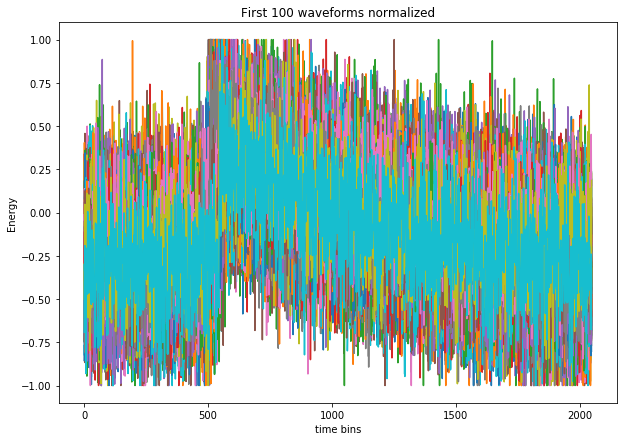

In [10]:
t = np.arange(2048)
fig, ax = plt.subplots(1, 1, figsize = (10,7))
for n in range(0,100):
    ax.plot(t, data_norm[n])
    ax.set_xlabel("time bins")
    ax.set_ylabel("Energy")
ax.title.set_text("First 100 waveforms normalized")

# Dimensionality Reduction using principal component analysis

In [11]:
u, s, vh = np.linalg.svd(data, full_matrices=False)

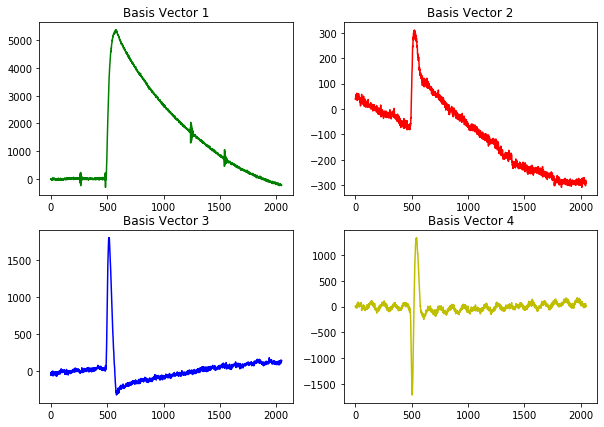

In [12]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
ax[0,0].plot(u[0,0]*s[0]*vh[0], color = 'g')
ax[0,0].title.set_text("Basis Vector 1")
ax[0,1].plot(u[1,1]*s[1]*vh[1], color = 'r')
ax[0,1].title.set_text("Basis Vector 2")
ax[1,0].plot(u[2,2]*s[2]*vh[2], color = 'b')
ax[1,0].title.set_text("Basis Vector 3")
ax[1,1].plot(u[3,3]*s[3]*vh[3], color = 'y')
ax[1,1].title.set_text("Basis Vector 4")

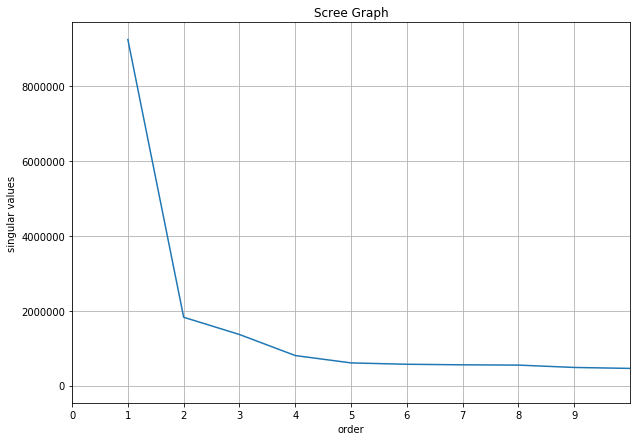

In [13]:
scree_order = np.arange(1,len(s)+1)
fig, ax = plt.subplots(1, 1, figsize = (10,7))
ax.plot(scree_order, s)
ax.title.set_text("Scree Graph")
ax.set_ylabel("singular values")
ax.set_xlabel("order")
ax.set_xlim([0,10])
ax.set_xticks(np.arange(0,10))
plt.grid()
plt.show()

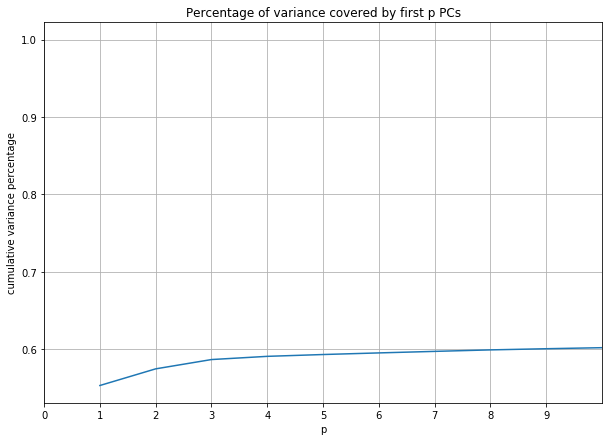

In [14]:
variance = np.zeros_like(s)
for i in range(len(s)):
    variance[i] = s[i]**2
total_variance = 0
for i in range(len(variance)):
    total_variance += variance[i]
    
pvc = np.zeros_like(variance)
for i in range(len(pvc)):
    pvc[i] = variance[i] + pvc[i-1]
for i in range(len(pvc)):
    pvc[i] = pvc[i] / total_variance
    
fig, ax = plt.subplots(1, 1, figsize = (10,7))
ax.plot(scree_order, pvc)
ax.title.set_text('Percentage of variance covered by first p PCs')
ax.set_xlabel('p')
ax.set_ylabel('cumulative variance percentage')
ax.set_xlim(0,10)
ax.set_xticks(np.arange(0,10))
plt.grid()
plt.show()

In [15]:
v = np.transpose(vh)
vD = v[:,:5]
rDataD = data_norm@vD

In [16]:
del u, s, vh, vD
gc.collect()

21377

# Start HDBSCAN

In [17]:
doubleDistances = distance_matrix(rDataD, rDataD)
#double counts distances. Get upper triangle matrix then manipulate it 
temp = np.triu(doubleDistances)
distances = np.asarray(temp).reshape(-1)
distances = np.sort(distances)
distances = np.flip(distances)
#remove 0s where repeats used to be
nonzeros = int((len(doubleDistances)*len(doubleDistances) - 1)/2)
distances = distances[0:nonzeros]
order = np.arange

gc.collect()

20

In [18]:
hdb = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True).fit(rDataD)
labels = hdb.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

counts = np.zeros(n_clusters)
for i in range(n_clusters):
    for label in labels:
        if label == i:
            counts[i] += 1
            
percentage_counts = counts/len(data)
for i in range(len(percentage_counts)):
    percentage_counts[i] = round(percentage_counts[i], 3)

In [19]:
print ("Number of clusters: " + str(n_clusters))
print ("Number of noise points: " + str(n_noise))
print ("% of data included in clustering: " + str (1 - n_noise/len(labels)))

Number of clusters: 2
Number of noise points: 1333
% of data included in clustering: 0.8441664718260463


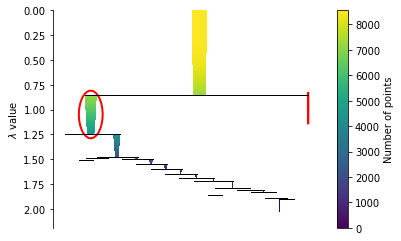

In [20]:
hdb.condensed_tree_.plot(select_clusters=True)

In [21]:
avgSin = np.arange(2048)
avgDou = np.arange(2048)
avgTri = np.arange(2048)
numSin = 0
numDou = 0
numTri = 0
avgSin = avgSin.astype(float)
avgDou = avgSin.astype(float)
avgTri = avgSin.astype(float)

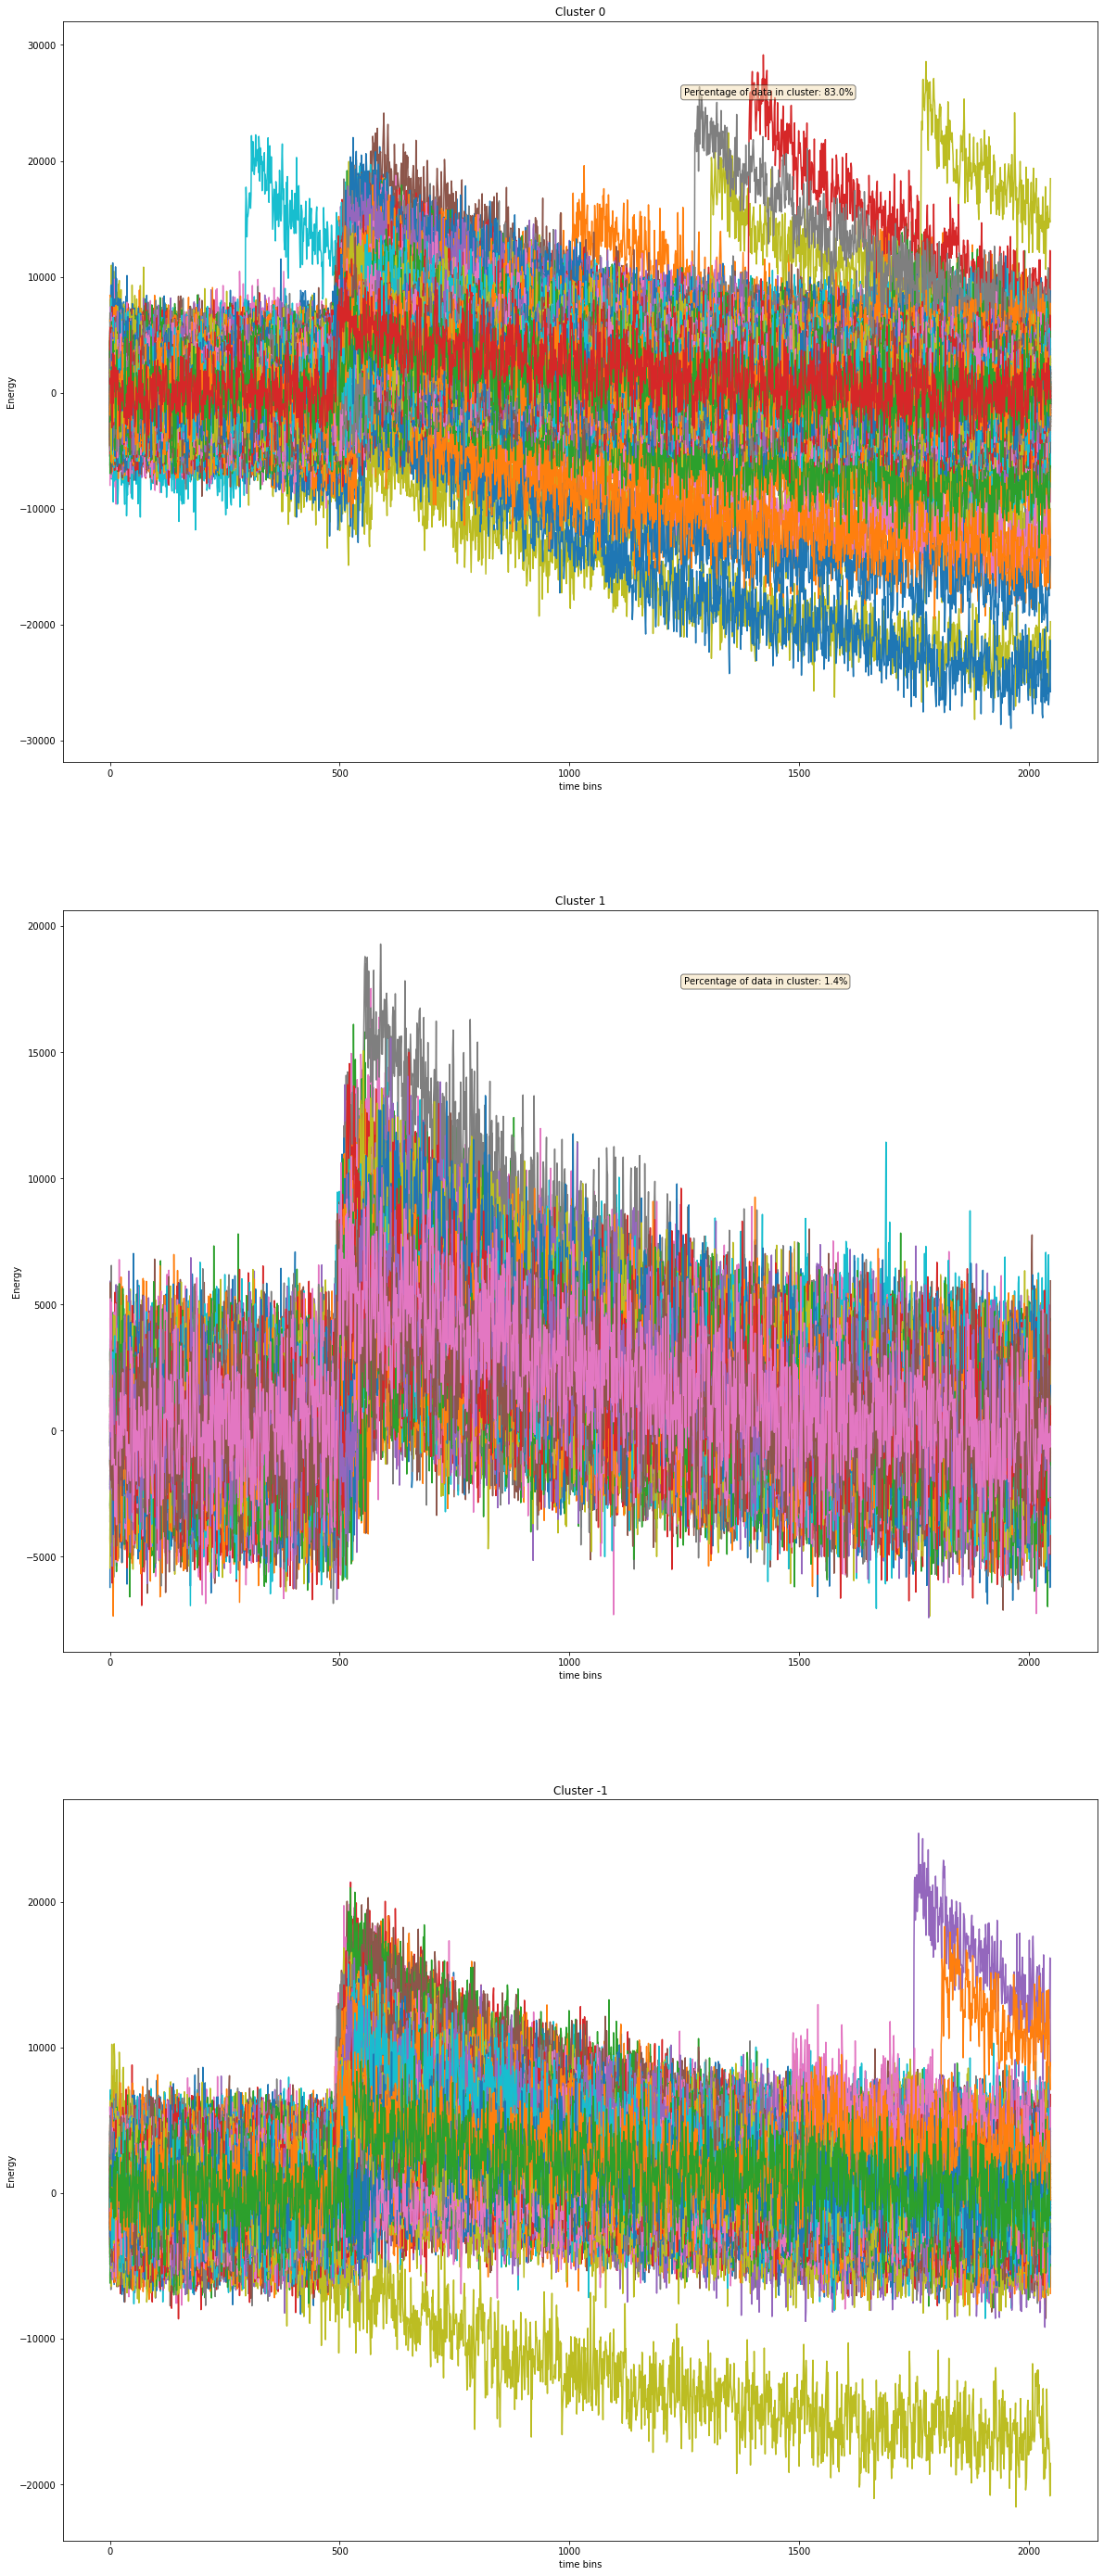

In [22]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, ax = plt.subplots(n_clusters+1, figsize = (20,50))
t = np.arange(2048)
for n in range(len(data)):
    for i in range(-1, n_clusters):
        if i == labels[n]:
            #collecting averages
            if i == 1:
                avgSin += data[n]
                numSin += 1
            if i == 2:
                avgDou += data[n]
                numDou += 1
            if i == 0:
                avgTri += data[n]
                numTri += 1
            ax[i].plot(t, data[n])
            ax[i].title.set_text("Cluster " + str(i))
            ax[i].set_xlabel("time bins")
            ax[i].set_ylabel("Energy")
for i in range(n_clusters):
        text_x = ax[i].get_xlim()[1] - 0.4*(ax[i].get_xlim()[1] - ax[i].get_xlim()[0])
        text_y = ax[i].get_ylim()[1] - 0.1*(ax[i].get_ylim()[1] - ax[i].get_ylim()[0])
        ax[i].text(text_x, text_y, "Percentage of data in cluster: " + str(round(100*percentage_counts[i], 3)) + "%", bbox = props)
plt.show()

/Users/elicarter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/elicarter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


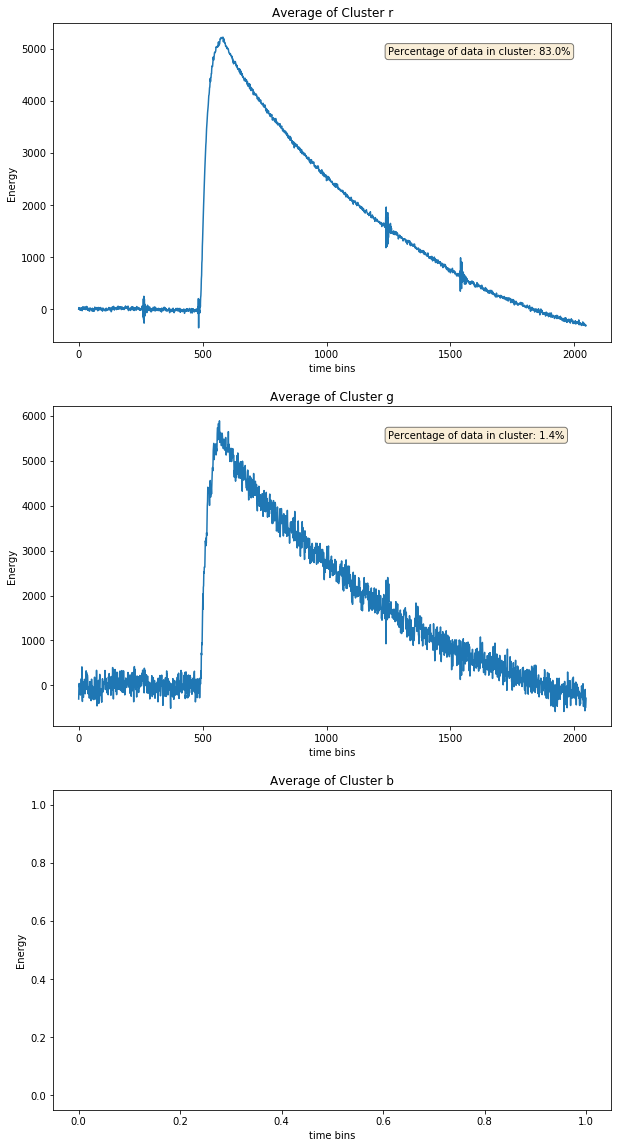

In [23]:
for i in range(2048):
    avgSin[i] = avgSin[i]/numSin
    avgDou[i] = avgDou[i]/numDou
    avgTri[i] = avgTri[i]/numTri
avgs = np.vstack((avgTri, avgSin, avgDou))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, ax = plt.subplots(len(avgs), figsize = (10,20))    
for i in range(len(avgs)):
    ax[i].plot(t, avgs[i])
    ax[i].title.set_text("Average of Cluster " + str(colors[i]))
    ax[i].set_xlabel("time bins")
    ax[i].set_ylabel("Energy")
for i in range(n_clusters):
        text_x = ax[i].get_xlim()[1] - 0.4*(ax[i].get_xlim()[1] - ax[i].get_xlim()[0])
        text_y = ax[i].get_ylim()[1] - 0.1*(ax[i].get_ylim()[1] - ax[i].get_ylim()[0])
        ax[i].text(text_x, text_y, "Percentage of data in cluster: " + str(round(100*percentage_counts[i], 3)) + "%", bbox = props)
plt.show()